<a href="https://colab.research.google.com/github/sjcorp/notebooks/blob/master/ml_projects/ml_project_carprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
# From Google Drive
gd_car_train = 'https://drive.google.com/file/d/1NI7dTxmekoaLR-4GHbmhSEw5_BDgq1S3/view?usp=sharing'
gd_car_test = 'https://drive.google.com/file/d/1lxwa3eK5T4XnU1A4qY730_q8m5-miV-e/view?usp=sharing'

In [2]:
cartrain = 'https://drive.google.com/uc?export=download&id='+gd_car_train.split('/')[-2]
cartest = 'https://drive.google.com/uc?export=download&id='+gd_car_test.split('/')[-2]

# Import Libraries

In [3]:
# Import Primary Libraries
import sys
import scipy
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Import ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load Visualization Libraries
from pandas.plotting import scatter_matrix

# Load Data Preprocessing Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Load Data Evaluation Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load, Analyze & Visualize Data

In [4]:
# Load Data
df = pd.read_csv(cartrain)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df_test = pd.read_csv(cartest)
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [6]:
# Splitting Name into Brand Name and Car Model Name
brandsplit = df["Name"].str.split(" ", n=1, expand = True)
df['Brand'] = brandsplit[0]
df['Model'] = brandsplit[1]

# Dropping the old columns and creating a new dataframe
df1 = df.drop(columns=["Name","Model"],inplace=False)

df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi


In [30]:
df1.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
Brand                 object
dtype: object

In [31]:
df1.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  43
New_Price            5195
Price                   0
Brand                   0
dtype: int64

In [7]:
# Change New Price to String to perform String Search; will later convert it to Float 
df1['New_Price']=df['New_Price'].astype(str)

In [8]:
# Check New Price feature that have value in Cr
df1.loc[df1.New_Price.str.contains('Cr',case=False)]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
148,Mumbai,2013,23000,Petrol,Automatic,First,11.05 kmpl,2894 CC,444 bhp,4.0,1.28 Cr,37.00,Audi
327,Coimbatore,2017,97430,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,1.04 Cr,62.67,Audi
489,Pune,2017,129000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1 Cr,56.00,Mercedes-Benz
1336,Mumbai,2016,20002,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,1.04 Cr,67.00,Audi
1505,Kochi,2019,26013,Diesel,Automatic,First,12.65 kmpl,2993 CC,255 bhp,5.0,1.39 Cr,97.07,Land
1885,Delhi,2018,6000,Diesel,Automatic,First,11.0 kmpl,2987 CC,258 bhp,7.0,1.02 Cr,79.00,Mercedes-Benz
2056,Kochi,2015,29966,Diesel,Automatic,Second,16.77 kmpl,2993 CC,261.49 bhp,5.0,1.4 Cr,43.60,BMW
2095,Coimbatore,2019,2526,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,1.06 Cr,83.96,Mercedes-Benz
2178,Mumbai,2017,35000,Diesel,Automatic,First,18.0 kmpl,2993 CC,255 bhp,7.0,1.27 Cr,41.60,Land
2528,Delhi,2016,59000,Diesel,Automatic,First,18.0 kmpl,2993 CC,255 bhp,7.0,1.13 Cr,36.75,Land


In [9]:
# df1['New']=df1.loc[df1.New_Price.str.contains('Cr',case=False)]

df1['New_Price']=np.where((df1.New_Price.str.contains('Cr',case=False)),df1['New_Price'].astype(str).map(lambda x: x.rstrip('Lakh, Cr')).astype(float)*100,df1.New_Price)
df1['New_Price']=np.where((df1.New_Price.str.contains('Lakh',case=False)),df1['New_Price'].astype(str).map(lambda x: x.rstrip('Lakh, Cr')).astype(float),df1.New_Price)
df1.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
Brand                 object
dtype: object

In [10]:
df1['New_Price']=df1['New_Price'].astype(float)

In [13]:
df1.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price            float64
Price                float64
Brand                 object
dtype: object

In [15]:
df1.iloc[[4079]]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
4079,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,230.0,160.0,Land


In [28]:
# convert all object dtypes to string
df1[['Location','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Brand']] = df1[['Location','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Brand']].astype(str)

In [29]:
# Fill Missing Values in New_Price
# First Clean up the Non-Null Rows
# df1['New_Price'] = df1['New_Price'].astype(str).map(lambda x: x.rstrip(' Lakh, Cr')).astype(float)
# df1['New_Price'].head()

In [32]:
# df1['Engine'] = df1['Engine'].str.replace(r'\w',r'',regex=True).a
df2 = df1
df2['Engine'] = df1['Engine'].str.replace(r'\D+', '')
# df2['Engine']=df2['Engine'].astype(int)
df2['Engine'].head()
df2['Engine'].isnull().sum()

0

In [5]:
#checking the number of features in the Datasets
print(df.columns.count())
# print(df_test.columns)

AttributeError: 'Index' object has no attribute 'count'

In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
# Analyze Data
print(df.shape) # Number of Row & Columns
print(df.head) # Top 5 & Bottom 5 Rows
print(df.describe()) # Statistical Summary
# print(dataset.groupby('species').size()) # Distribution of the dependent variable in the given dataset

(4340, 8)
<bound method NDFrame.head of                                      name  year  ...  transmission         owner
0                           Maruti 800 AC  2007  ...        Manual   First Owner
1                Maruti Wagon R LXI Minor  2007  ...        Manual   First Owner
2                    Hyundai Verna 1.6 SX  2012  ...        Manual   First Owner
3                  Datsun RediGO T Option  2017  ...        Manual   First Owner
4                   Honda Amaze VX i-DTEC  2014  ...        Manual  Second Owner
...                                   ...   ...  ...           ...           ...
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014  ...        Manual  Second Owner
4336           Hyundai i20 Magna 1.4 CRDi  2014  ...        Manual  Second Owner
4337                  Maruti 800 AC BSIII  2009  ...        Manual  Second Owner
4338     Hyundai Creta 1.6 CRDi SX Option  2016  ...        Manual   First Owner
4339                     Renault KWID RXT  2016  ...        Manual   

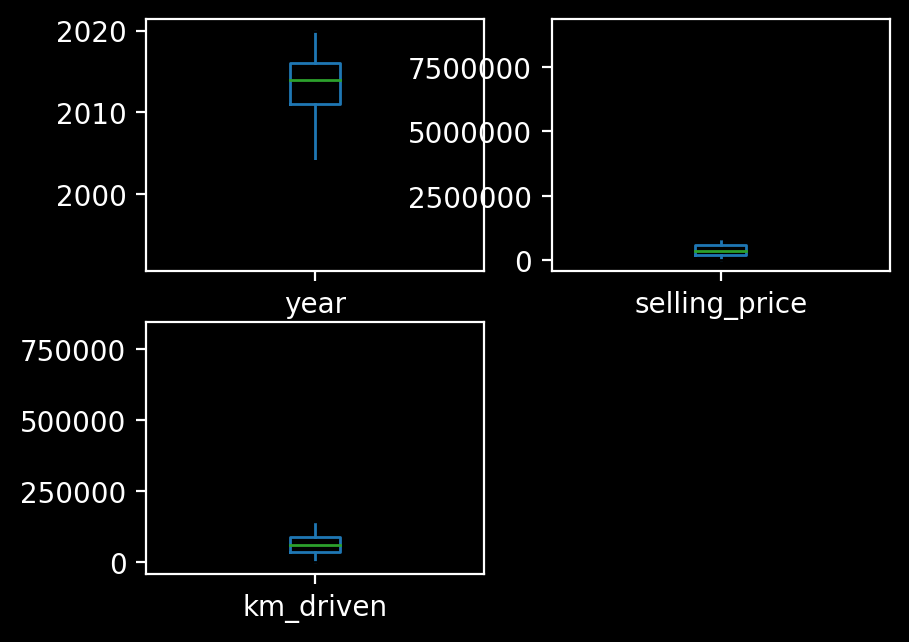

AttributeError: 'DataFrame' object has no attribute 'show'

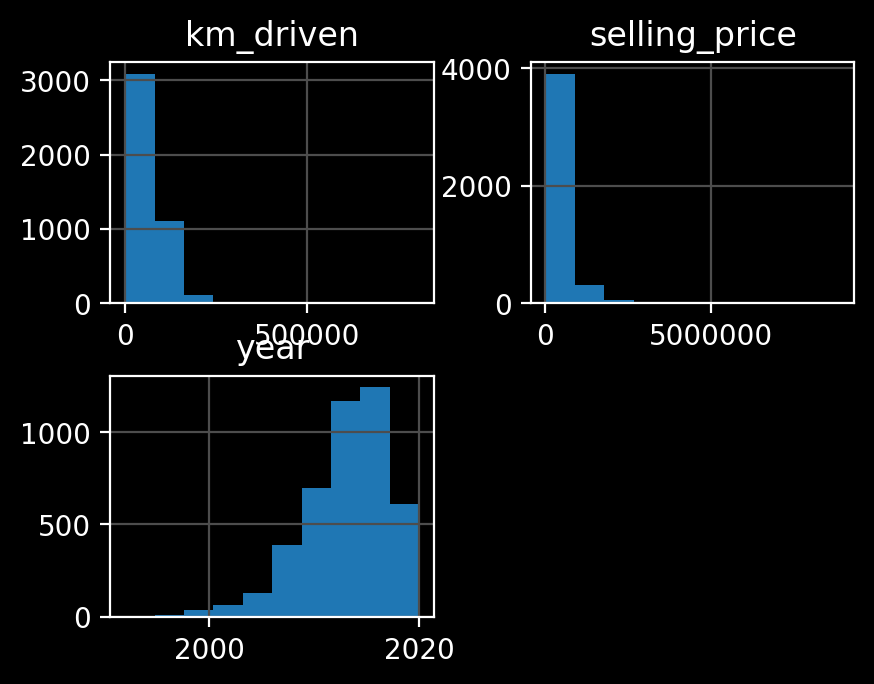

In [ ]:
# Visualize Data
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False) # box and whisker plots
plt.show()
df.hist() # histograms
df.show()
scatter_matrix(df) # scatter plot matrix
plt.show()

# Feature Engineering - Missing Values

In [ ]:
## Fill missing value using category means
# df["value"] = df.groupby("name").transform(lambda x: x.fillna(x.mean()))
# df['value'] = df['value'].fillna(df.groupby('name')['value'].transform('mean'))

# Feature Engineering - Standardization & Normalization

# Feature Engineering - Scaling

# Feature Selection

# Final Data Frame

# Train-Test Split

In [ ]:
# Separate Feature & Response Variable; split them into test and train data
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

# Run & Compare Algorithms

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.933333 (0.050000)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


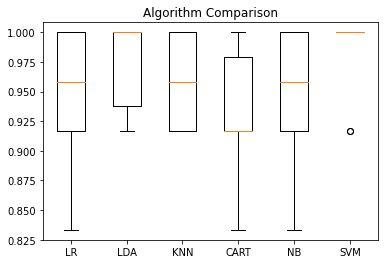

In [ ]:
# LList Algorithms to Compare
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr'))) # Used for binary output
models.append(('LDA', LinearDiscriminantAnalysis())) # 
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Train Algorithms
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
 
# Evaluate Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Make Prediction Using Selected Algorithm

In [ ]:
# Make Predictions
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Create Pipeline

# Save Model as PKL File for Deployment with Flask

# Get Data for requirements.txt file

In [ ]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.10.0
scipy==1.4.1
scikit-learn==0.22.1
pandas==1.0.3
numpy==1.18.2
matplotlib==3.2.1
